In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import font_manager, rc

In [ ]:
plt.rc('font', family='NanumBarunGothic')
df = pd.read_excel('원본_임금_데이터셋.xlsx',	engine='openpyxl')

In [ ]:
# 성별을 숫자로 매핑: 여성을 0, 남성을 1로 설정
df['성별'] = df['성별'].map({'여성': 0, '남성': 1})

# 임금을 숫자로 매핑: '60M미만'을 0, '60M이상'을 1로 설정
df['임금'] = df['임금'].map({'<=60M': 0, '>60M': 1})

# 이름은 모델에 사용하지 않을 것이므로 제거
df.drop(['이름'], axis=1, inplace=True)

In [ ]:
X = df.drop('임금', axis=1)  # 입력 변수
y = df['임금']               # 목표 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 테스트 세트에서의 성능 평가
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

# 성능 평가
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       156
           1       0.95      0.93      0.94        44

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.97      0.97       200

[[154   2]
 [  3  41]]


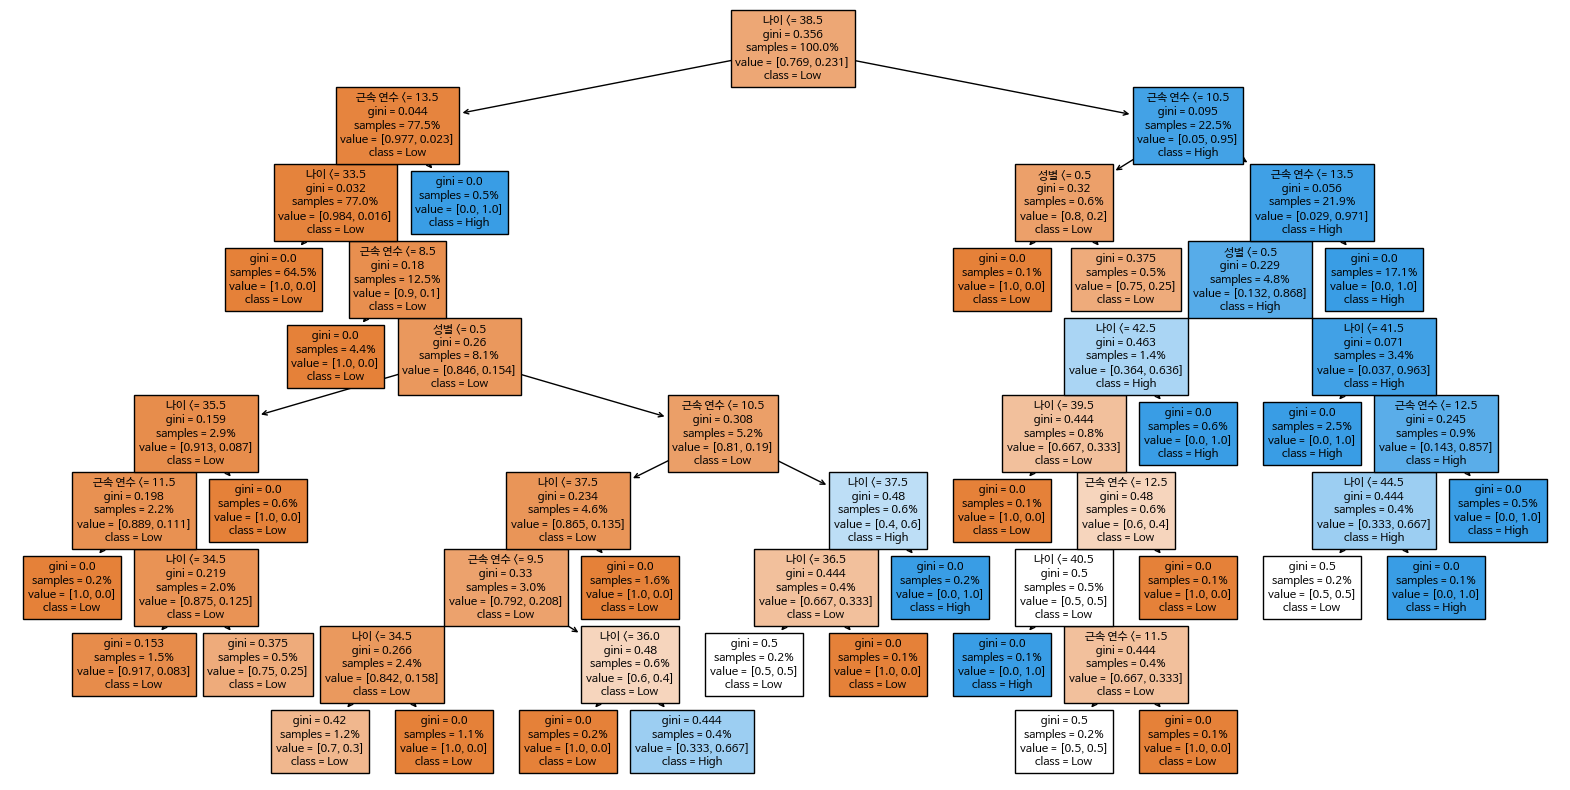

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Low', 'High'], proportion=True)
plt.show()